### Source : https://www.kaggle.com/datasets/thedevastator/airbnb-prices-in-european-cities

# 1. Introduction

## Before getting into any analysis, let's sum up what this dataset offers.

## For this, we need to first import and then display the dataset using Pandas.

In [1]:
import pandas as pd

In [2]:
rent_data = pd.read_csv("/home/loick/Documents/Airbnb/Aemf1.csv")
rent_data.head(30)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


### Let's break it down.

### The columns are quite self-explanatory. This dataset shows any kind of rent provided by air bnb according to : 

### - their type
### - their price
### - the person capacity
### - the "superhost" status

### And so on, including ratings about the quality of the accomodation. 

### This dataset is also clearly SQL material, but we let this part for a further case study.

# 2. Guideline

## How can we use this dataset to provide insightful information about Airbnb services ? 

## It would be interesting to analyze how the price varies according to the features of the flat : its distance from the city center, its person capacity. Machine Learning (ML) models could even allow us to forecast the average price of a given flat, provided its features.

# 3. Exploration

## 3.1) Price forecast

### Before trying to forecast any price, we need to know what has an actual impact on it. We can use a multiple regression for this purpose. 

### Let's define which variables might have an impact on the price, and let's drop which are clearly irrelevant.

### "Roomtype" : we can confidently assert that the roomtype has an impact on the price ; it makes sense to rent a flat cheaper if it is made of just one room, and more expensive if it offers a full accomodation with several rooms.

### "Shared room" : usually, rooms are shared to reduce the price of the single rent. It might have an impact on the price.

### "Private room" : this variable sounds a bit redundant with the previous one. The same logic applies for this one.

### "Person capacity" : the bigger this number is, the bigger the flat is supposed to be. Bigger surface means bigger price.

### "Superhost" : it is an indicator of the renter's trustworthiness. It influences the selection of the customer, but not the price itself. We can drop it.

### "Multiple rooms" : a bit redundant with "person capacity". Related to the surface. It might impact the price.

### "Business" : whether or not the flat is rented for business purposes. It is the client's concern, not the renter's, we can drop it.

### "Cleanliness rating" : same logic as for the superhost, it is merely an indicator of trust.

### "Guest satisfaction" : same logic as above.

### "bedrooms" : the more bedrooms, the more space. It might impact the price.

###  "City center" & "Metro distance" : two important features. A flat located in the city center will, expectingly, charge more. Same goes for the metro distance.

### The last 4 columns about indexes are merely indicators of trust, like above.

## To sum up, we are going to drop for this part : the last 4 indexes columns, "cleanliness rating", "guest satisfaction" and "superhost".

In [3]:
indexes_to_drop = [7,10,11,15,16,17,18]
rent_data_price_forecast = rent_data.drop(rent_data.columns[indexes_to_drop], axis=1)

In [68]:
rent_data_price_forecast.head(10)

,City,Price,Day,Room_Type,Shared Room,Private Room,Person Capacity,Multiple Rooms,Business,Bedrooms,City Center (km),Metro Distance (km)
0,Amsterdam,194.033698,1,Private room,False,True,2.0,1,0,1,5.022964,2.539380
1,Amsterdam,344.245776,1,Private room,False,True,4.0,0,0,1,0.488389,0.239404
2,Amsterdam,264.101422,1,Private room,False,True,2.0,0,1,1,5.748312,3.651621
3,Amsterdam,433.529398,1,Private room,False,True,4.0,0,1,2,0.384862,0.439876
4,Amsterdam,485.552926,1,Private room,False,True,2.0,0,0,1,0.544738,0.318693
5,Amsterdam,552.808567,1,Private room,False,True,3.0,0,0,2,2.131420,1.904668
6,Amsterdam,215.124317,1,Private room,False,True,2.0,0,0,1,1.881092,0.729747
7,Amsterdam,2771.307384,1,Entire home/apt,False,False,4.0,0,0,3,1.686807,1.458404
8,Amsterdam,1001.804420,1,Entire home/apt,False,False,4.0,0,0,2,3.719141,1.196112
9,Amsterdam,276.521454,1,Private room,False,True,2.0,1,0,1,3.142361,0.924404


## Quick check-up for null values

In [5]:
rent_data_price_forecast.isnull().sum()

City                   0
Price                  0
Day                    0
Room Type              0
Shared Room            0
Private Room           0
Person Capacity        0
Multiple Rooms         0
Business               0
Bedrooms               0
City Center (km)       0
Metro Distance (km)    0
dtype: int64

## Let's visualize a possible relation between the data : we suspect the distance from the city center to influence on the price.

## Let's check it out with a scatterplot graph.

In [6]:
import matplotlib.pyplot as plt

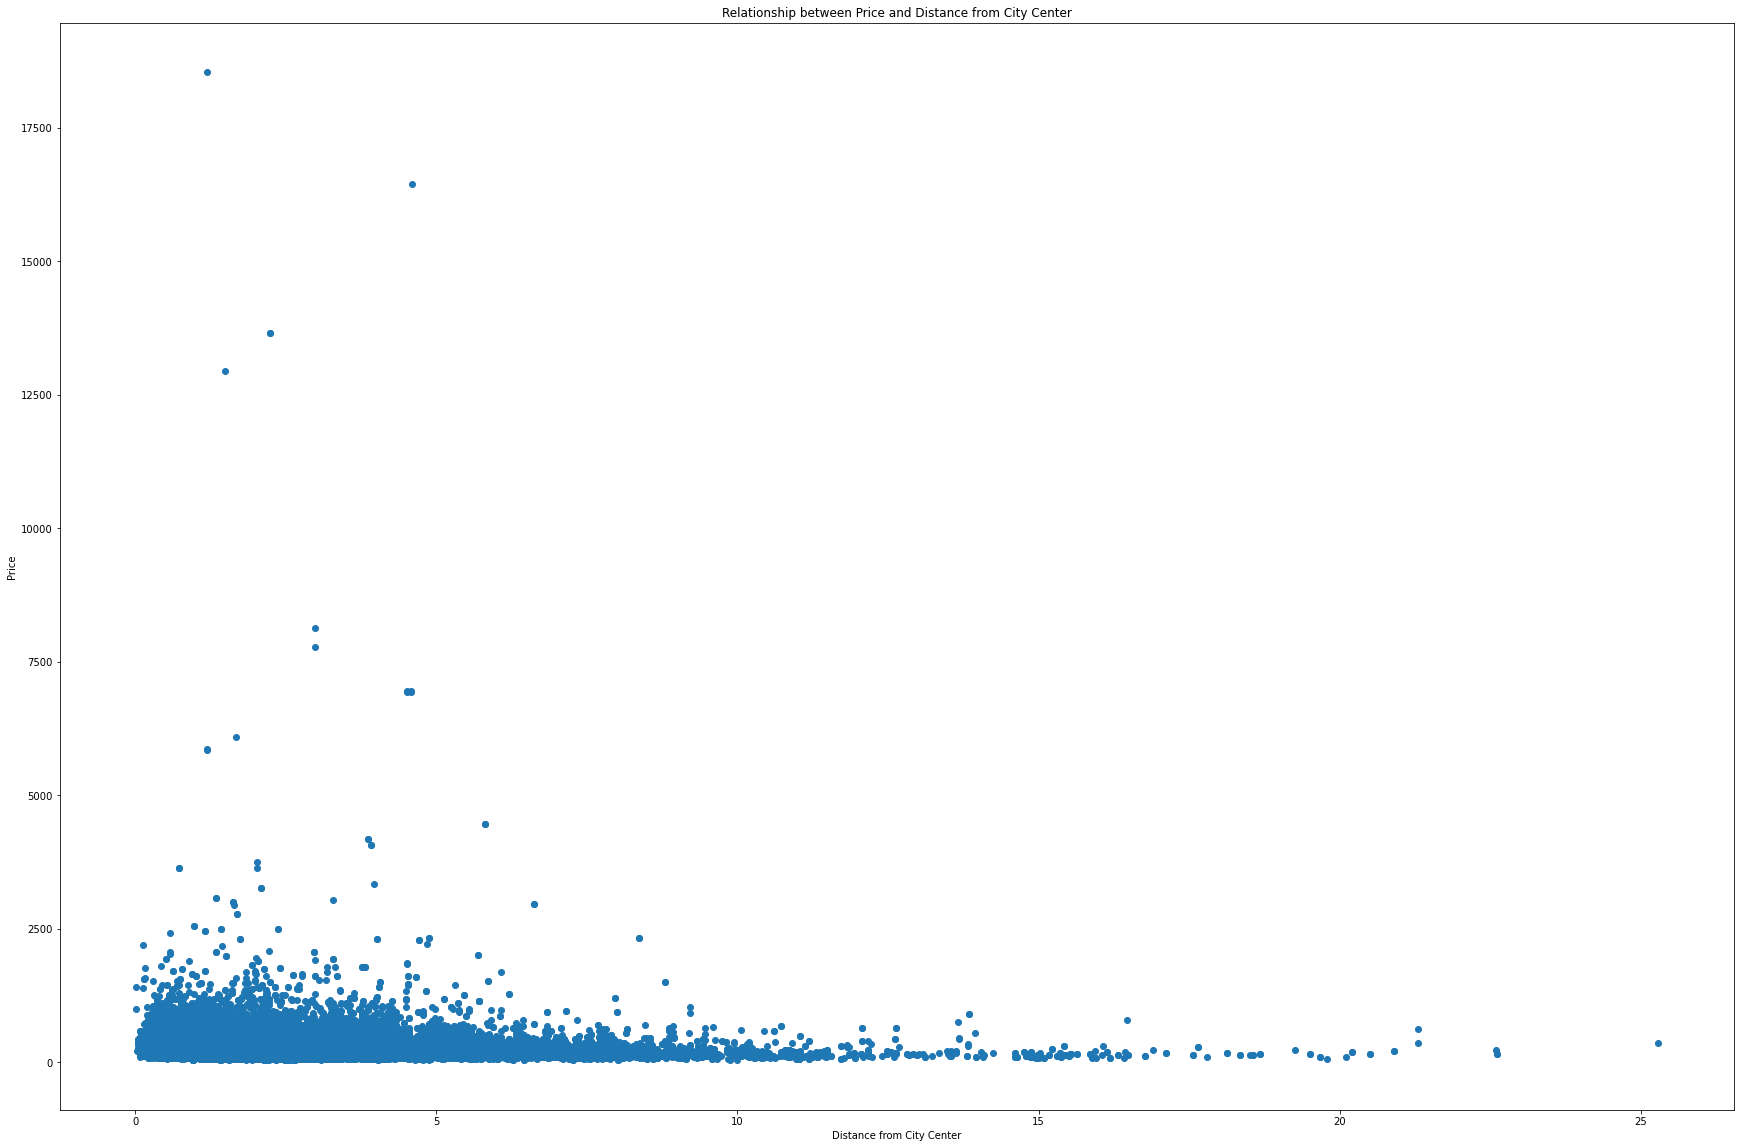

In [7]:
# Scatter plot for distance from the city center
plt.figure(figsize=(30, 20))  # Adjust the width and height as desired
plt.scatter(rent_data_price_forecast['City Center (km)'], rent_data_price_forecast['Price'])
plt.xlabel('Distance from City Center')
plt.ylabel('Price')
plt.title('Relationship between Price and Distance from City Center')
plt.show()

## We can see that a relationship is here, but no so strong as we could expect : not very linear, and a lot of ouliers. Let's visualize it better by removing a certain quantity of outliers from the graph, and see if a trend shows up more clearly.

In [8]:
import numpy as np

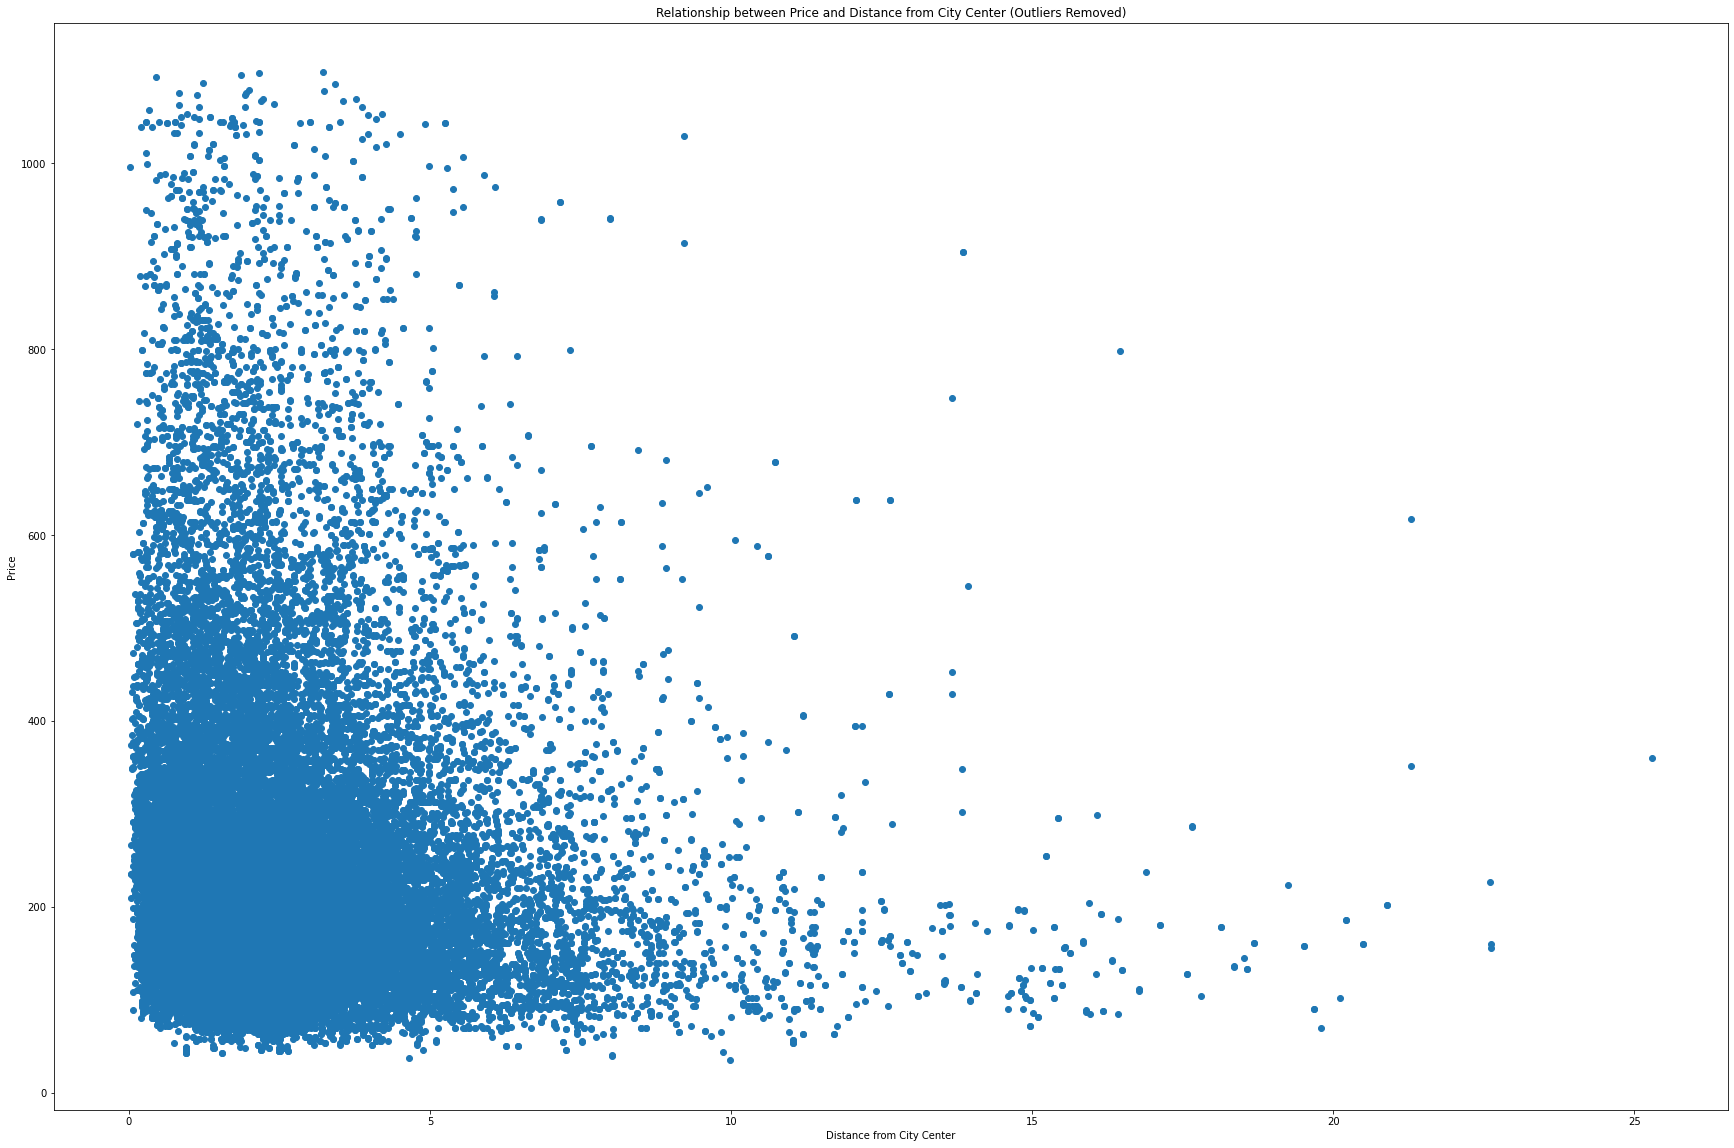

In [9]:
# Calculate the Z-scores for the 'price' column
z_scores = np.abs((rent_data_price_forecast['Price'] - rent_data_price_forecast['Price'].mean()) / rent_data_price_forecast['Price'].std())

# Set a threshold for the Z-score (e.g., 3)
threshold = 3

# Remove rows where the 'price' exceeds the threshold
rent_data_price_forecast_arranged = rent_data_price_forecast[z_scores < threshold]

# Generate scatter plot for the cleaned data
plt.figure(figsize=(30, 20))
plt.scatter(rent_data_price_forecast_arranged['City Center (km)'], rent_data_price_forecast_arranged['Price'])
plt.xlabel('Distance from City Center')
plt.ylabel('Price')
plt.title('Relationship between Price and Distance from City Center (Outliers Removed)')
plt.show()

## We removed from the graph all the values, centered around the mean, that exceed three times the value of the standard deviation.

## The relation appears a bit more clearly : the closest a flat is from the city center, the more expensive it is likely to be put at rent.

## A metric, the correlation coefficient, allows us to quantify this relation.

In [10]:
# Calculate the correlation coefficient
correlation = rent_data_price_forecast_arranged['Price'].corr(rent_data_price_forecast_arranged['City Center (km)'])

print("Correlation coefficient: ", correlation)

Correlation coefficient:  -0.08888827068743797


## According to this metric, around 9% of the distribution of prices is negatively explained by the distribution of the distances from the city center. It technically means what we stated above, that the further a flat is from the city center, the cheaper it is rented.

## Now, we would like to implement a model that allows us to better explain the variations of prices by including other variables.

In [12]:
rent_data_price_forecast.rename(columns={'Room Type': 'Room_Type'}, inplace=True)
rent_data_price_forecast.head(5)

,City,Price,Day,Room_Type,Shared Room,Private Room,Person Capacity,Multiple Rooms,Business,Bedrooms,City Center (km),Metro Distance (km)
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,1,0,1,5.022964,2.539380
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,0,0,1,0.488389,0.239404
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,0,1,1,5.748312,3.651621
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,0,1,2,0.384862,0.439876
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,0,0,1,0.544738,0.318693


In [13]:
import statsmodels.api as sm

In [14]:
rent_data_price_forecast_types = rent_data_price_forecast.dtypes
print(rent_data_price_forecast_types)

City                    object
Price                  float64
Day                     object
Room_Type               object
Shared Room               bool
Private Room              bool
Person Capacity        float64
Multiple Rooms           int64
Business                 int64
Bedrooms                 int64
City Center (km)       float64
Metro Distance (km)    float64
dtype: object


## After some clean-up of the data, we choose tree variables to implement our model : city center, metro distance, number of bedrooms. The model we choose is ordinary least square (OLS).

In [15]:
y = rent_data_price_forecast['Price']
#X = rent_data_price_forecast[['Room_Type','Shared Room','Person Capacity', 'Multiple Rooms','Business', 'Bedrooms','City Center (km)','Metro Distance (km)']]
X = rent_data_price_forecast[['City Center (km)','Metro Distance (km)','Bedrooms']]
X = sm.add_constant(X)

In [16]:
model = sm.OLS(y, X)
results = model.fit()

In [18]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     675.5
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:07:03   Log-Likelihood:            -2.9316e+05
No. Observations:               41714   AIC:                         5.863e+05
Df Residuals:                   41710   BIC:                         5.864e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 175.5746    

### The interpretation of the p-value in the chart above proves us that, given the data we have on hand, all the variables that we chose impact significantly the price of the rent. 

### However, the R-squared is only about 5%. It can be explained easily : the scatterplot of the distribution obviously proved that the relation between the variable is not linear, but the OLS model creates a linear approximation of this relation. We can add to this fact that we didn't include all the variables that we could to fully explain the variations of the price.

### Following this logic, let's add one variable and try again to see if there is a big difference between the two models. Let's add 'day', which describes if the flat is rented a weekday of during the weekend.

### To add the variable, we need to change the data. 'Day' is a categorical variable. To include it into a regression, we need to change it into numerical. For this purpose, we choose to turn it into a 'dummy' variable that takes only two values : 0 for weekday and  1 for weekend.

In [19]:
rent_data_price_forecast['Day'] = rent_data_price_forecast['Day'].replace({'Weekday': 1, 'Weekend': 0})
rent_data_price_forecast.head(30)

,City,Price,Day,Room_Type,Shared Room,Private Room,Person Capacity,Multiple Rooms,Business,Bedrooms,City Center (km),Metro Distance (km)
0,Amsterdam,194.033698,1,Private room,False,True,2.0,1,0,1,5.022964,2.539380
1,Amsterdam,344.245776,1,Private room,False,True,4.0,0,0,1,0.488389,0.239404
2,Amsterdam,264.101422,1,Private room,False,True,2.0,0,1,1,5.748312,3.651621
3,Amsterdam,433.529398,1,Private room,False,True,4.0,0,1,2,0.384862,0.439876
4,Amsterdam,485.552926,1,Private room,False,True,2.0,0,0,1,0.544738,0.318693
5,Amsterdam,552.808567,1,Private room,False,True,3.0,0,0,2,2.131420,1.904668
6,Amsterdam,215.124317,1,Private room,False,True,2.0,0,0,1,1.881092,0.729747
7,Amsterdam,2771.307384,1,Entire home/apt,False,False,4.0,0,0,3,1.686807,1.458404
8,Amsterdam,1001.804420,1,Entire home/apt,False,False,4.0,0,0,2,3.719141,1.196112
9,Amsterdam,276.521454,1,Private room,False,True,2.0,1,0,1,3.142361,0.924404


In [20]:
y = rent_data_price_forecast['Price']
#X = rent_data_price_forecast[['Room_Type','Shared Room','Person Capacity', 'Multiple Rooms','Business', 'Bedrooms','City Center (km)','Metro Distance (km)']]
X = rent_data_price_forecast[['City Center (km)','Metro Distance (km)','Bedrooms','Day']]
X = sm.add_constant(X)

In [21]:
model = sm.OLS(y, X)
results = model.fit()

In [22]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     508.7
Date:                Sun, 21 May 2023   Prob (F-statistic):               0.00
Time:                        16:07:12   Log-Likelihood:            -2.9316e+05
No. Observations:               41714   AIC:                         5.863e+05
Df Residuals:                   41709   BIC:                         5.864e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 179.2698    

### The OLS applied to this model proves that the day of the rent also has a significant impact on the price, but less than the other variables. However, it doesn't improve the R-squared but very fewly.

### Let's go a little deeper into the relevance of the 'day' variable and check if there is a significant difference between the price on weekday and weekend by implementing a test.

In [23]:
from scipy.stats import mannwhitneyu

# Filter prices for weekdays
weekday_prices = rent_data_price_forecast[rent_data_price_forecast['Day'] == 1]['Price']

# Filter prices for weekends
weekend_prices = rent_data_price_forecast[rent_data_price_forecast['Day'] == 0]['Price']

# Perform a test
statistic, p_value = mannwhitneyu(weekday_prices, weekend_prices)

print(statistic, p_value)

# Check the p-value
if p_value < 0.05:
    print("There is a significant difference between weekday and weekend prices.")
else:
    print("There is no significant difference between weekday and weekend prices.")


209669755.5 1.8533298884125107e-10
There is a significant difference between weekday and weekend prices.


In [24]:
# Calculate the average of weekday prices
weekday_avg_price = np.mean(weekday_prices)

# Print the average price
print("Average weekday price:", weekday_avg_price)

Average weekday price: 257.0040089963572


In [25]:
# Calculate the average of weekday prices
weekend_avg_price = np.mean(weekend_prices)

# Print the average price
print("Average weekend price:", weekend_avg_price)

Average weekend price: 263.1934421465412


### The test states that there is a real difference between weekday and weekend. By calculating the means of both distributions, we say that this difference exists, but it is not so big.

In [77]:
price_gap = ((weekend_avg_price - weekday_avg_price) / weekday_avg_price)*100
print('On weekend, the prices raise by an average of',"%.3f" % price_gap,"%")

On weekend, the prices raise by an average of 2.408 %


### To visualize this difference, we can create a kernel density plot. A kernel density plot is a type of plot that displays the distribution of values in a dataset using one continuous curve. 

In [28]:
import seaborn as sns

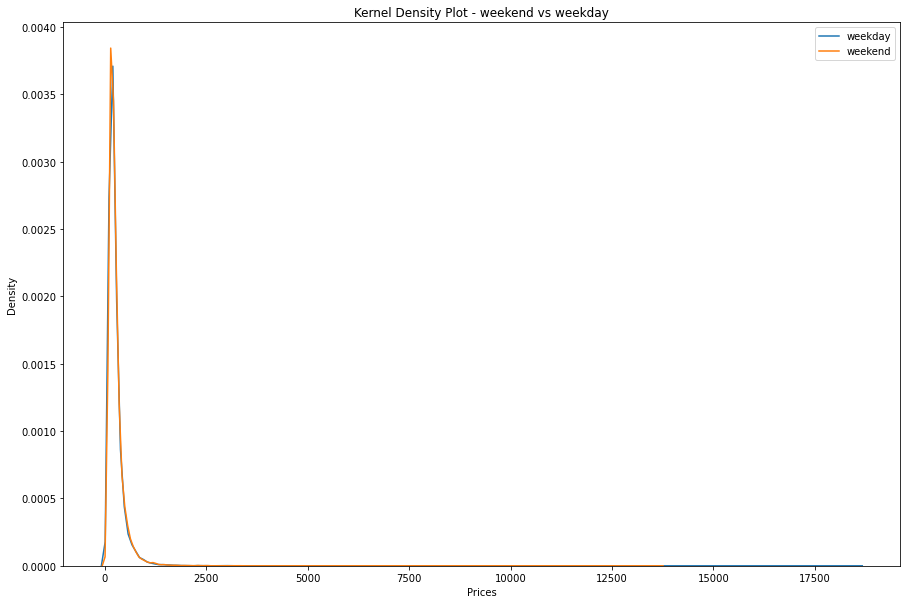

In [29]:
# Create a kernel density plot
plt.figure(figsize=(15, 10))  # Adjust the width and height as desired
sns.kdeplot(weekday_prices, label='weekday')
sns.kdeplot(weekend_prices, label='weekend')
plt.xlabel('Prices')
plt.ylabel('Density')
plt.title('Kernel Density Plot - weekend vs weekday')
plt.legend()
plt.show()

### In conclusion, we see that the two distributions describe, indeed, the same tendencies, with a bit of a higher peak for weekend prices.

## Now, we would like to create several ML models with our four variables, and see which performs the best to explain the variability of the prices.

## 1. Linear regression model ; it assumes a linear relationship between the variables and calculates the best-fitted hyperplane by minimizing the errors between the real values and the predicted ones.

In [30]:
from sklearn.model_selection import train_test_split

# Separate features and target variable
X = rent_data_price_forecast[['City Center (km)','Metro Distance (km)','Bedrooms','Day']]
y = rent_data_price_forecast['Price']

# Perform data split with 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [32]:
# Create an instance of LinearRegression
linear_model = LinearRegression()

# Fit the model on the training data
linear_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_linear = linear_model.predict(X_test)

# Evaluate the model's performance
mse_linear = mean_squared_error(y_test, y_pred_linear)

In [33]:
mse_linear

97069.90441182928

In [50]:
# Make predictions on new data using the linear regression model
new_data = [[4.277507, 2.264840, 1,1]]  # Replace with actual values for the new data
predicted_price_linear = linear_model.predict(new_data)
print("The predicted price for these flat features is : ", predicted_price_linear)

The predicted price for these flat features is :  [210.11914501]


/home/loick/Downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
# Make predictions on the testing data using the linear regression model
predicted_price_linear_test = linear_model.predict(X_test)
predicted_price_linear_test

array([210.11914346, 266.07396815, 436.09692102, ..., 321.19488965,
       347.04584995, 166.82110247])

## 2. Tree regression model

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
# Create an instance of DecisionTreeRegressor
tree_model = DecisionTreeRegressor()

# Fit the model on the training data
tree_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model's performance
mse_tree = mean_squared_error(y_test, y_pred_tree)

In [36]:
mse_tree

64304.04440004046

In [51]:
# Make predictions on new data using the tree regression model
new_data = [[4.277507, 2.264840, 1,1]]  # Replace with actual values for the new data
predicted_price_tree = tree_model.predict(new_data)
print("The predicted price for these flat features is : ", predicted_price_tree)

The predicted price for these flat features is :  [172.30495874]


/home/loick/Downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [53]:
# Make predictions on the testing data using the decision tree regression model
predicted_price_tree_test = tree_model.predict(X_test)
predicted_price_tree_test

array([172.30495874, 170.26266417, 197.08012092, ..., 202.46417132,
       310.24244266, 131.39129825])

## 3. Random forest regression

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [41]:
# Create an instance of RandomForestRegressor
forest_model = RandomForestRegressor()

# Fit the model on the training data
forest_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_forest = forest_model.predict(X_test)

# Evaluate the model's performance
mse_forest = mean_squared_error(y_test, y_pred_forest)

In [40]:
mse_forest

70040.41547808675

In [55]:
# Make predictions on new data using the random forest regression model
new_data = [[4.277507, 2.264840, 1,1]]  # Replace with actual values for the new data
predicted_price_forest = forest_model.predict(new_data)
print("The predicted price for these flat features is : ", predicted_price_forest)b

The predicted price for these flat features is :  [150.31198125]


/home/loick/Downloads/ENTER/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [56]:
# Make predictions on the testing data using the decision tree regression model
predicted_price_forest_test = forest_model.predict(X_test)
predicted_price_forest_test

array([150.31198125, 225.76763546, 250.4452903 , ..., 206.54612112,
       381.24552943, 191.59132596])

## To wrap up : displaying a unique dataset with the columns of the actual prices, and the columns of the gaps between these prices and the predicted ones by each model.

In [79]:
# Create a DataFrame with the independent variables
data = pd.DataFrame(X_test, columns=['City Center (km)', 'Metro Distance (km)', 'Bedrooms','Day'])

# Add the predicted prices from each model as columns
data['actual_price'] = y_test
data['predicted_linear'] = predicted_price_linear_test
data['predicted_tree'] = predicted_price_tree_test
data['predicted_forest'] = predicted_price_forest_test
data['gap_linear'] = data['predicted_linear'] - data['actual_price']
data['gap_tree'] = data['predicted_tree'] - data['actual_price']
data['gap_forest'] = data['predicted_forest'] - data['actual_price']

# Display the DataFrame
print(data)

       City Center (km)  Metro Distance (km)  Bedrooms  Day  actual_price  \
14125          4.277507             2.264840         1    1     92.823236   
36825          0.657824             0.206999         1    0    152.432609   
6890           2.318620             0.395691         3    0    197.080121   
24859          4.080136             0.353669         0    1    279.149967   
1808           4.220551             0.312017         2    0    854.170084   
...                 ...                  ...       ...  ...           ...   
34823          5.550061             0.864905         2    0    161.550511   
37644          2.609516             1.326461         1    0    225.375821   
31990          4.851924             0.512579         2    1    201.762794   
36234          2.352340             0.256263         2    0    331.517546   
14446          0.482358             0.241859         0    1    148.517178   

       predicted_linear  predicted_tree  predicted_forest  gap_linear  \
14

In [83]:
# Calculate the average gap for each model
avg_gap_linear = data['gap_linear'].mean()
avg_gap_tree = data['gap_tree'].mean()
avg_gap_forest = data['gap_forest'].mean()

# Display the average gap for each model
print("Average Gap for Linear Regression:", avg_gap_linear)
print("Average Gap for Decision Tree Regression:", avg_gap_tree)
print("Average Gap for Random Forest Regression:", avg_gap_forest)


Average Gap for Linear Regression: 1.812074195415203
Average Gap for Decision Tree Regression: 1.187980531860163
Average Gap for Random Forest Regression: 1.8559036863256728


## According to the average gap, the best performing model is the Decision Tree regression.

## Let's try according to another metric : the root mean squared error (RMSE). The lower it is, the better accuracy the model has.

In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate metrics for linear regression
mae_linear = mean_absolute_error(y_test, predicted_price_linear_test)
mse_linear = mean_squared_error(y_test, predicted_price_linear_test)
rmse_linear = np.sqrt(mse_linear)

# Calculate metrics for decision tree regression
mae_tree = mean_absolute_error(y_test, predicted_price_tree_test)
mse_tree = mean_squared_error(y_test, predicted_price_tree_test)
rmse_tree = np.sqrt(mse_tree)

# Calculate metrics for random forest regression
mae_forest = mean_absolute_error(y_test, predicted_price_forest_test)
mse_forest = mean_squared_error(y_test, predicted_price_forest_test)
rmse_forest = np.sqrt(mse_forest)

# Print the metrics
print("Linear Regression:")
print("MAE:", mae_linear)
print("MSE:", mse_linear)
print("RMSE:", rmse_linear)
print()

print("Decision Tree Regression:")
print("MAE:", mae_tree)
print("MSE:", mse_tree)
print("RMSE:", rmse_tree)
print()

print("Random Forest Regression:")
print("MAE:", mae_forest)
print("MSE:", mse_forest)
print("RMSE:", rmse_forest)

Linear Regression:
MAE: 126.01955950506478
MSE: 97069.90441182928
RMSE: 311.5604346059192

Decision Tree Regression:
MAE: 81.53323105431784
MSE: 64304.04440004046
RMSE: 253.58242131512282

Random Forest Regression:
MAE: 91.73646916268731
MSE: 72887.03354328484
RMSE: 269.9759869752953


## Here again, we see that the decision tree regression performs the best by having the lowest RMSE from the three models.

# General conclusion

## As a businessman, it is wise to put a flat at rent that matches these conditions :

## - be close to the city center and close to public transportation.
## - have enough bedrooms.
## - rent on weekends by a higher price, to make a higher profit.